<a href="https://colab.research.google.com/github/codebuzer/Bioactivity-Prediction-App/blob/main/csir-igib-project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/igib_project1/expmat.tsv", sep = '\t')

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/igib_project1/metadata.tsv', sep = '\t')

In [5]:
df1 = df1.iloc[:,1:]

In [6]:
df2= df2.iloc[:,1:]

In [7]:
df_concat = pd.concat([df1, df2], axis=1)

In [8]:
X = df_concat.drop(['infection'], axis=1)

In [9]:
y = df_concat['infection']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state = 42, shuffle = True)


In [12]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'batch',
       'agenum', 'ctnum'],
      dtype='object')

In [13]:
X_train['agenum'].dropna().sample(X_train['agenum'].isnull().sum(),random_state=0)

97     22.0
74     44.0
301    40.0
472    30.0
471    54.0
165    75.0
366    57.0
245    37.0
219    78.0
434    51.0
263    57.0
204    65.0
404    42.0
199    59.0
327    50.0
269    57.0
197    57.0
194    62.0
351    86.0
267    30.0
47     51.0
14     86.0
316    38.0
58     78.0
162    56.0
21     23.0
308    71.0
288    36.0
315    39.0
133    27.0
240    71.0
216    33.0
230    77.0
Name: agenum, dtype: float64

In [14]:
X_train[X_train['agenum'].isnull()].index

Int64Index([424, 420, 346, 314, 354, 109, 429, 422, 139, 349, 369, 416, 123,
            357, 423, 419, 275, 179, 127, 352, 221, 415, 279, 421, 417, 295,
            428, 166, 363, 252, 276, 443, 413],
           dtype='int64')

In [15]:
def impute_nan(df,variable,mode):
    df[variable+"_mode"]=df[variable].fillna(mode)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the nan value
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [16]:
mode=X_train.agenum.mode()
mode

0    51.0
dtype: float64

In [17]:
impute_nan(X_train,"agenum",mode)

In [18]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V46,V47,V48,V49,V50,batch,agenum,ctnum,agenum_mode,agenum_random
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,-0.151642,-0.004632,-0.146563,0.013029,-0.131632,L,50.0,22.81,50.0,50.0
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0.019317,-0.070527,0.053134,0.179474,0.139848,Q,62.0,19.35,62.0,62.0
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,-0.198764,0.233642,-0.184023,-0.180516,-0.115021,D,72.0,21.34,72.0,72.0
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,-0.235243,-0.019517,-0.233459,0.179042,0.272707,N,30.0,25.36,30.0,30.0
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,0.001721,0.051858,-0.027145,0.207186,0.133435,M,35.0,24.41,35.0,35.0


In [19]:
mode=X_train.ctnum.mode()
mode

0    17.73
dtype: float64

In [20]:
impute_nan(X_train,"ctnum",mode)

In [21]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V48,V49,V50,batch,agenum,ctnum,agenum_mode,agenum_random,ctnum_mode,ctnum_random
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,-0.146563,0.013029,-0.131632,L,50.0,22.81,50.0,50.0,22.81,22.81
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0.053134,0.179474,0.139848,Q,62.0,19.35,62.0,62.0,19.35,19.35
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,-0.184023,-0.180516,-0.115021,D,72.0,21.34,72.0,72.0,21.34,21.34
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,-0.233459,0.179042,0.272707,N,30.0,25.36,30.0,30.0,25.36,25.36
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,-0.027145,0.207186,0.133435,M,35.0,24.41,35.0,35.0,24.41,24.41


In [22]:
X_train.isnull().sum()

V1                0
V2                0
V3                0
V4                0
V5                0
V6                0
V7                0
V8                0
V9                0
V10               0
V11               0
V12               0
V13               0
V14               0
V15               0
V16               0
V17               0
V18               0
V19               0
V20               0
V21               0
V22               0
V23               0
V24               0
V25               0
V26               0
V27               0
V28               0
V29               0
V30               0
V31               0
V32               0
V33               0
V34               0
V35               0
V36               0
V37               0
V38               0
V39               0
V40               0
V41               0
V42               0
V43               0
V44               0
V45               0
V46               0
V47               0
V48               0
V49               0
V50               0


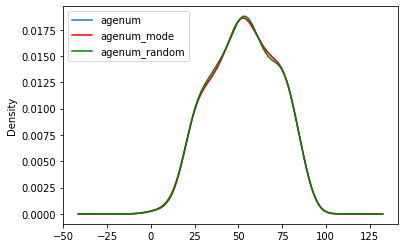

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['agenum'].plot(kind='kde', ax=ax)
X_train.agenum_mode.plot(kind='kde', ax=ax, color='red')
X_train.agenum_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

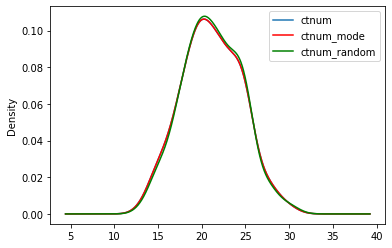

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['ctnum'].plot(kind='kde', ax=ax)
X_train.ctnum_mode.plot(kind='kde', ax=ax, color='red')
X_train.ctnum_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [26]:
X_train.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V48,V49,V50,batch,agenum,ctnum,agenum_mode,agenum_random,ctnum_mode,ctnum_random
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,-0.146563,0.013029,-0.131632,L,50.0,22.81,50.0,50.0,22.81,22.81
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0.053134,0.179474,0.139848,Q,62.0,19.35,62.0,62.0,19.35,19.35


In [28]:
X_train = X_train.drop(['agenum','ctnum','agenum_mode','ctnum_mode'], axis = 1)

In [29]:
X_train.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V44,V45,V46,V47,V48,V49,V50,batch,agenum_random,ctnum_random
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,-0.065396,0.001392,-0.151642,-0.004632,-0.146563,0.013029,-0.131632,L,50.0,22.81
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0.112702,0.000115,0.019317,-0.070527,0.053134,0.179474,0.139848,Q,62.0,19.35


In [30]:
X_train.isnull().sum()

V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
V29              0
V30              0
V31              0
V32              0
V33              0
V34              0
V35              0
V36              0
V37              0
V38              0
V39              0
V40              0
V41              0
V42              0
V43              0
V44              0
V45              0
V46              0
V47              0
V48              0
V49              0
V50              0
batch            0
agenum_random    0
ctnum_random

In [31]:
X_train = X_train.to_csv("train.csv")

In [82]:
df = pd.read_csv("/content/train.csv", index_col = 0)

In [83]:
df.shape

(363, 53)

In [84]:
df['batch'].nunique()

21

In [85]:
for col in df.columns:
  print(col,':',len(df[col].unique()), 'labels')

V1 : 363 labels
V2 : 363 labels
V3 : 363 labels
V4 : 363 labels
V5 : 363 labels
V6 : 363 labels
V7 : 363 labels
V8 : 363 labels
V9 : 363 labels
V10 : 363 labels
V11 : 363 labels
V12 : 363 labels
V13 : 363 labels
V14 : 363 labels
V15 : 363 labels
V16 : 363 labels
V17 : 363 labels
V18 : 363 labels
V19 : 363 labels
V20 : 363 labels
V21 : 363 labels
V22 : 363 labels
V23 : 363 labels
V24 : 363 labels
V25 : 363 labels
V26 : 363 labels
V27 : 363 labels
V28 : 363 labels
V29 : 363 labels
V30 : 363 labels
V31 : 363 labels
V32 : 363 labels
V33 : 363 labels
V34 : 363 labels
V35 : 363 labels
V36 : 363 labels
V37 : 363 labels
V38 : 363 labels
V39 : 363 labels
V40 : 363 labels
V41 : 363 labels
V42 : 363 labels
V43 : 363 labels
V44 : 363 labels
V45 : 363 labels
V46 : 363 labels
V47 : 363 labels
V48 : 363 labels
V49 : 363 labels
V50 : 363 labels
batch : 21 labels
agenum_random : 71 labels
ctnum_random : 285 labels


In [86]:
df['batch'].unique()

array(['L', 'Q', 'D', 'N', 'M', 'J', 'F', 'R', 'T', 'C', 'I', 'S', 'H',
       'A', 'G', 'E', 'P', 'K', 'O', 'B', 'U'], dtype=object)

In [87]:
df.batch.value_counts().sort_values(ascending = False)

Q    43
P    40
L    35
J    21
O    19
E    19
A    17
R    17
F    16
H    16
C    14
D    14
M    13
U    12
G    11
S    11
N    11
B    11
T     8
K     8
I     7
Name: batch, dtype: int64

In [88]:
df = pd.get_dummies(df,columns = ['batch'])

In [91]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'agenum_random', 'ctnum_random', 'batch_A', 'batch_B', 'batch_C',
       'batch_D', 'batch_E', 'batch_F', 'batch_G', 'batch_H', 'batch_I',
       'batch_J', 'batch_K', 'batch_L', 'batch_M', 'batch_N', 'batch_O',
       'batch_P', 'batch_Q', 'batch_R', 'batch_S', 'batch_T', 'batch_U'],
      dtype='object')

In [95]:
df.shape, y_train.shape

((363, 73), (363,))

In [65]:
df = df.to_csv("train1.csv")

In [81]:
df = pd.read_csv("/content/train1.csv", index_col = 0)
df.shape

(5, 73)

In [96]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'agenum_random', 'ctnum_random', 'batch_A', 'batch_B', 'batch_C',
       'batch_D', 'batch_E', 'batch_F', 'batch_G', 'batch_H', 'batch_I',
       'batch_J', 'batch_K', 'batch_L', 'batch_M', 'batch_N', 'batch_O',
       'batch_P', 'batch_Q', 'batch_R', 'batch_S', 'batch_T', 'batch_U'],
      dtype='object')

In [97]:
df['ctnum_random'].median()

21.11

In [98]:
def median_status(value):
  if value <= 22.81:
    return 0
  else:
    return 1

df['ctnum_median_status'] = df['ctnum_random'].map(median_status)

In [101]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'agenum_random', 'ctnum_random', 'batch_A', 'batch_B', 'batch_C',
       'batch_D', 'batch_E', 'batch_F', 'batch_G', 'batch_H', 'batch_I',
       'batch_J', 'batch_K', 'batch_L', 'batch_M', 'batch_N', 'batch_O',
       'batch_P', 'batch_Q', 'batch_R', 'batch_S', 'batch_T', 'batch_U',
       'ctnum_median_status'],
      dtype='object')

In [103]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,0,0,0,0,0,0,0,0,0,0
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0,0,0,0,1,0,0,0,0,0
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,0,0,0,0,0,0,0,0,0,0
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,0,1,0,0,0,0,0,0,0,1
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.178225,0.033551,0.130311,0.309763,0.053018,0.246189,-0.223009,0.235498,0.124811,0.142615,...,0,0,0,0,0,0,0,0,0,0
270,-0.084461,-0.050759,-0.028248,0.007801,0.076674,-0.079665,-0.131783,-0.160692,0.128844,-0.152991,...,0,0,0,1,0,0,0,0,0,0
348,0.001382,0.137369,0.023774,-0.089512,0.381360,-0.220417,0.073235,0.064732,-0.116873,0.123650,...,0,0,0,0,0,0,0,0,0,1
435,-0.065488,-0.064513,-0.098331,0.007988,-0.174017,0.171827,-0.113032,-0.179929,0.130941,-0.105149,...,0,0,0,0,0,1,0,0,0,0


In [104]:
y_train

397    1
57     1
286    1
132    1
406    1
      ..
106    1
270    1
348    1
435    0
102    1
Name: infection, Length: 363, dtype: int64

In [105]:
df = pd.concat([df,y_train], axis = 1)

In [106]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status,infection
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,0,0,0,0,0,0,0,0,0,1
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0,0,0,1,0,0,0,0,0,1
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,0,0,0,0,0,0,0,0,0,1
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,1,0,0,0,0,0,0,0,1,1
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,0,0,0,0,0,0,0,0,1,1


In [108]:
df = df.to_csv("final_train.csv")

In [110]:
df = pd.read_csv("final_train.csv", index_col = 0)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 397 to 102
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   V1                   363 non-null    float64
 1   V2                   363 non-null    float64
 2   V3                   363 non-null    float64
 3   V4                   363 non-null    float64
 4   V5                   363 non-null    float64
 5   V6                   363 non-null    float64
 6   V7                   363 non-null    float64
 7   V8                   363 non-null    float64
 8   V9                   363 non-null    float64
 9   V10                  363 non-null    float64
 10  V11                  363 non-null    float64
 11  V12                  363 non-null    float64
 12  V13                  363 non-null    float64
 13  V14                  363 non-null    float64
 14  V15                  363 non-null    float64
 15  V16                  363 non-null    f

In [116]:
246+117

363

In [120]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V44,V45,V46,V47,V48,V49,V50,batch,agenum,ctnum
418,0.416963,0.181283,0.064580,-0.256586,-0.022616,-0.317925,0.376913,0.086584,-0.255495,0.096489,...,-0.226848,-0.319698,0.276343,0.060116,0.060700,0.245187,0.187172,T,NaN,NaN
474,0.199633,0.206295,0.288382,-0.150975,0.394386,0.075909,-0.368996,0.323212,0.079250,0.018757,...,-0.012642,0.095101,-0.404423,0.115995,-0.187145,0.095741,0.022223,S,24.0,NaN
181,-0.431797,-0.050736,0.030278,-0.117923,0.246983,-0.160531,-0.197276,0.083967,0.028719,-0.148602,...,0.017100,0.219707,-0.222803,0.037870,-0.148073,0.197723,0.057452,Q,31.0,15.64
446,-0.379012,0.039950,0.292831,0.174339,0.256258,-0.020767,-0.409595,0.085018,0.011241,0.117534,...,0.025887,0.033908,-0.264123,-0.006608,-0.187606,-0.146445,-0.155532,S,22.0,NaN
297,0.451459,-0.048828,-0.089349,-0.151467,0.136524,-0.169697,0.116059,-0.235683,-0.048781,0.168612,...,0.056885,-0.185860,0.162456,-0.015781,0.221084,0.204374,0.190762,E,70.0,25.53
